In [2]:
from wand.image import Image as WImage
from IPython.display import Image

Protocol used by Albertas to generate this data: https://benchling.com/anavickas/f/lib_VNejBHt6-protocols/prt_2Bkfh557-meripseq/edit

HIV-1 IIIB Virus 
https://aidsreagent.org/reagentdetail.cfm?t=viruses&id=607

# Preprocessing

We've started analyzing from raw `fastq` files. Then, we trimmed `NNNAGATCGGAAGAGCACACGTCTGAACTCCAGTCA` sequence from each reads using `cutadapt` ([see documents](https://cutadapt.readthedocs.io/en/stable/)). Trimmed `fastq` files aligned to Human genome `gencode.v28.annotation.gtf` using STAR aligner. In addition, unmmaped reads for each `fastq` file saved to a new `fastq` file to align seprately to HIV genome. Therefore, HIV genome indices created by changing sequence provided by Judd to `.fa` format using `bowtie2` ([see documents](https://github.com/BenLangmead/bowtie2)).

For downstream analysis of meRIPSeq experiment, all `bam`  files (mapped to human genome or hiv genome) renamed in this format: 
> `<sample>.<species>.<treatment>.<input/m6A>.bam`

# QC

As expected, there is high density of methylation peaks at end of CDS. 

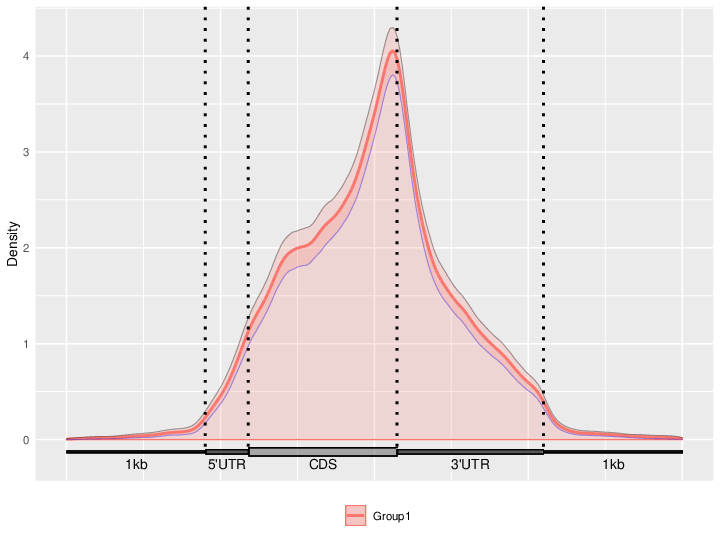

In [2]:
img = WImage(filename='plots/control_mrna_test.pdf', resolution=90) # bigger
img

## Motif analysis 

We've anlyzed only non-trated samples here. We've used [FIRE](https://tavazoielab.c2b2.columbia.edu/FIRE/) to compare m6A vs. input peaks for `[AG]GAC` and `[AGT][AG]AC[ACT]` motifs. The result shows significant presence of these motifs as expected. 

In [3]:
img = WImage(filename='exomepeak/control/motifs_of_interest_FIRE/RNA/peaks_teiser.txt.summary.pdf', 
             resolution=800) # bigger
img

# Internal controls
???


# Peakcalling 

We supposed to use `RADAR` package for meRIP data analysis. Instead, we are following a costom piplne that includes in the `notebook.ipynb` file. 


## Control vs. treatments 

`exomepeak` claculate coverage for only non threted samples. It compare `input` and `m6A`s  of both replicates to gives us peaks as a `bed12` file. We provide these peaks as feature to use `feature-count` to count exome reads that match these peaks. Then, we have done differential expression analysis using `DESeq2` to evaluate diffrentioal peaks. 

As you can see, There is high pairwise correlation between all KO treatments. However, PCA (Principal component analysis) plots clearly show more Technical variance vs. biological variability in the datasets. 

<table>
  <tr>
    <td><img src="plots/Corrplot.png" style="height:300px">
    <td><img src="plots/all_PCAs.png" style="height:400px">
  <tr>
<table>

<table>
  <tr>
    <td><img src="plots/all_Histograms.png" style="height:300px">
    <td><img src="plots/all_Volcanos.png" style="height:400px">
  <tr>
<table>


The top 30 most variable genes between different conditions 
<table>
  <tr>
    <td><img src="plots/All_Heatmap.png" style="height:500px">        
  <tr>
<table>


# HIV
Here, we counted reads that map to the peaks that `Piranha` found in HIV genome (see notebook for detail). 

<img src="plots/hiv.peak_Heatmaps.png" style="height:600px">

## HIV Peaks 
Using `Gviz` R package to visualize bedgraph of each treatments vs. non-treated. 
### METTL14
<table>
  <tr>
    <td><img src="plots/hiv.METTL14.peak-1.png" width="200" />
    <td><img src="plots/hiv.METTL14.peak-2.png" width="200" />
    <td><img src="plots/hiv.METTL14.peak-3.png" width="200" />
  <tr>
<table>
<table>
  <tr>
    <td><img src="plots/hiv.METTL14.peak-4.png" width="200" />
    <td><img src="plots/hiv.METTL14.peak-5.png" width="200" />
    <td><img src="plots/hiv.METTL14.peak-6.png" width="200" />
  </tr>
 </table>

### METTL3

<table>
  <tr>
    <td><img src="plots/hiv.METTL3.peak-1.png" width="200" />
    <td><img src="plots/hiv.METTL3.peak-2.png" width="200" />
    <td><img src="plots/hiv.METTL3.peak-3.png" width="200" />
  <tr>
<table>
<table>
  <tr>
    <td><img src="plots/hiv.METTL3.peak-4.png" width="200" />
    <td><img src="plots/hiv.METTL3.peak-5.png" width="200" />
    <td><img src="plots/hiv.METTL3.peak-6.png" width="200" />
  </tr>
 </table>

### Virma

<table>
  <tr>
    <td><img src="plots/hiv.Virma.peak-1.png" width="200" />
    <td><img src="plots/hiv.Virma.peak-2.png" width="200" />
    <td><img src="plots/hiv.Virma.peak-3.png" width="200" />
  <tr>
<table>
<table>
  <tr>
    <td><img src="plots/hiv.Virma.peak-4.png" width="200" />
    <td><img src="plots/hiv.Virma.peak-5.png" width="200" />
    <td><img src="plots/hiv.Virma.peak-6.png" width="200" />
  </tr>
 </table>

### WTAP
<table>
  <tr>
    <td><img src="plots/hiv.WTAP.peak-1.png" width="200" />
    <td><img src="plots/hiv.WTAP.peak-2.png" width="200" />
    <td><img src="plots/hiv.WTAP.peak-3.png" width="200" />
  <tr>
<table>
<table>
  <tr>
    <td><img src="plots/hiv.WTAP.peak-4.png" width="200" />
    <td><img src="plots/hiv.WTAP.peak-5.png" width="200" />
    <td><img src="plots/hiv.WTAP.peak-6.png" width="200" />
  </tr>
 </table>

## Similar paper 
> [Dynamics of the human and viral m6 A RNA methylomes during HIV-1 infection of T cells](https://www.nature.com/articles/nmicrobiol201611.pdf?proof=t)
[GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE74016)

It might be informative to analyze data in this paper using above pipeline. However, they’re using [pLAI.2 HIV](https://aidsreagent.org/reagentdetail.cfm?t=molecular_clones&id=47) clone. 